In [1]:
import plotly.graph_objects as go
from PIL import Image
import requests
from io import BytesIO #try 1

def show_map(buildings, building_names, building_coordinates, demand, truck_coordinates, placed_trucks = []):
    """displays the Burrito Optimization map with labels for open truck locations, buildings with demand, and placed trucks [optional].  This is intended to be used in the Gurobi Days Intro to Modeling course"""

    y_max = 550

    truck_spot_x = [value[0] for key, value in truck_coordinates.items()]
    truck_spot_y = [y_max - value[1] for key, value in truck_coordinates.items()]
    trucks = [key for key, value in truck_coordinates.items()]

    building_x = [value[0] for key, value in building_coordinates.items()]
    building_y = [y_max - value[1] for key, value in building_coordinates.items()]
    demand = [value for key, value in demand.items()]
    building_names = [value for key, value in building_names.items()]

    if placed_trucks:
        placed_truck_spot_x = [value[0] for key, value in truck_coordinates.items() if key in placed_trucks]
        placed_truck_spot_y = [y_max - value[1] for key, value in truck_coordinates.items() if key in placed_trucks]
        placed_trucks = [key for key, value in truck_coordinates.items() if key in placed_trucks]

    map = Image.open('map.png')
    fig = go.Figure()

    # Add trace for truck spots
    fig.add_trace(
        go.Scatter(x=truck_spot_x, y=truck_spot_y,
                   hovertemplate=trucks,
                   name="Open truck spots",
                   mode='markers',
                   marker_color='rgba(135, 206, 250, 0.0)',
                   marker_line_color='darkblue',
                   marker_line_width=2,
                   marker_size=10
                   )
    )

    # Add trace for placed trucks
    if placed_trucks:
        fig.add_trace(
            go.Scatter(x=placed_truck_spot_x, y=placed_truck_spot_y,
                       hovertemplate=placed_trucks,
                       name="Truck added to the map",
                       mode='markers',
                       marker_color='darkblue',
                       marker_line_color='darkblue',
                       marker_line_width=2,
                       marker_size=10
                       )
        )

    # Add trace for buildings
    fig.add_trace(
        go.Scatter(x=building_x, y=building_y,
                   hovertemplate=building_names,
                   name="Buildings with customer demand",
                   mode='markers',
                   marker_color='red',
                   marker_opacity=0.5,
                   marker_line_width=0,
                   marker_size=demand
                   )
    )

    # Add minimap image
    fig.add_layout_image(
            dict(
                source=map,
                xref="x",
                yref="y",
                x=0,
                y=550,
                sizex=500,
                sizey=550,
                sizing="stretch",
                opacity=0.9,
                layer="below")
    )

    # Set templates
    fig.update_layout(template="simple_white")
    fig.update_xaxes(range=[0, 500], visible=False)
    fig.update_yaxes(range=[0,550], visible=False,
                    scaleanchor = "x",scaleratio = 1)
    fig.update_layout(showlegend=True)

    fig.update_layout(
        title="Burrito Optimization Game Map",
    )

    fig.show()



Start loading data...

Loading day1 data...
  Problem data loaded successfully | Price: ₲10.0 Cost: ₲5.0
  Truck locations | Total: 56 Actually available: 15
  Demand nodes | Total: 15
  Valid customer-location pairs | Count: 100

Loading day2 data...
  Problem data loaded successfully | Price: ₲10.0 Cost: ₲5.0
  Truck locations | Total: 56 Actually available: 20
  Demand nodes | Total: 29
  Valid customer-location pairs | Count: 275

Loading day3 data...
  Problem data loaded successfully | Price: ₲10.0 Cost: ₲7.0
  Truck locations | Total: 56 Actually available: 20
  Demand nodes | Total: 29
  Valid customer-location pairs | Count: 273

Loading day4 data...
  Problem data loaded successfully | Price: ₲10.0 Cost: ₲5.0
  Truck locations | Total: 56 Actually available: 20
  Demand nodes | Total: 29
  Valid customer-location pairs | Count: 43

Loading day5 data...
  Problem data loaded successfully | Price: ₲10.0 Cost: ₲5.0
  Truck locations | Total: 56 Actually available: 56
  Demand no

Thread count was 20 (of 20 available processors)

Solution count 10: 18304 18279 18194 ... 18140

Optimal solution found (tolerance 1.00e-04)
Best objective 1.830400000000e+04, best bound 1.830400000000e+04, gap 0.0000%
Solving completed | Status: 2 | Time: 21.07s

Optimal solution (Total profit: ₲18304.00)

Day day1:
  - Deployed trucks: 4 (New)
  - Deployed trucks: 4 (New)
  - Daily profit: ₲710.00 (Revenue: ₲1560.00, Cost: ₲850.00)
    * Location truck33: Small (New)
    * Location truck8: Small (New)
    * Location truck37: Small (New)
    * Location truck17: Medium (New)



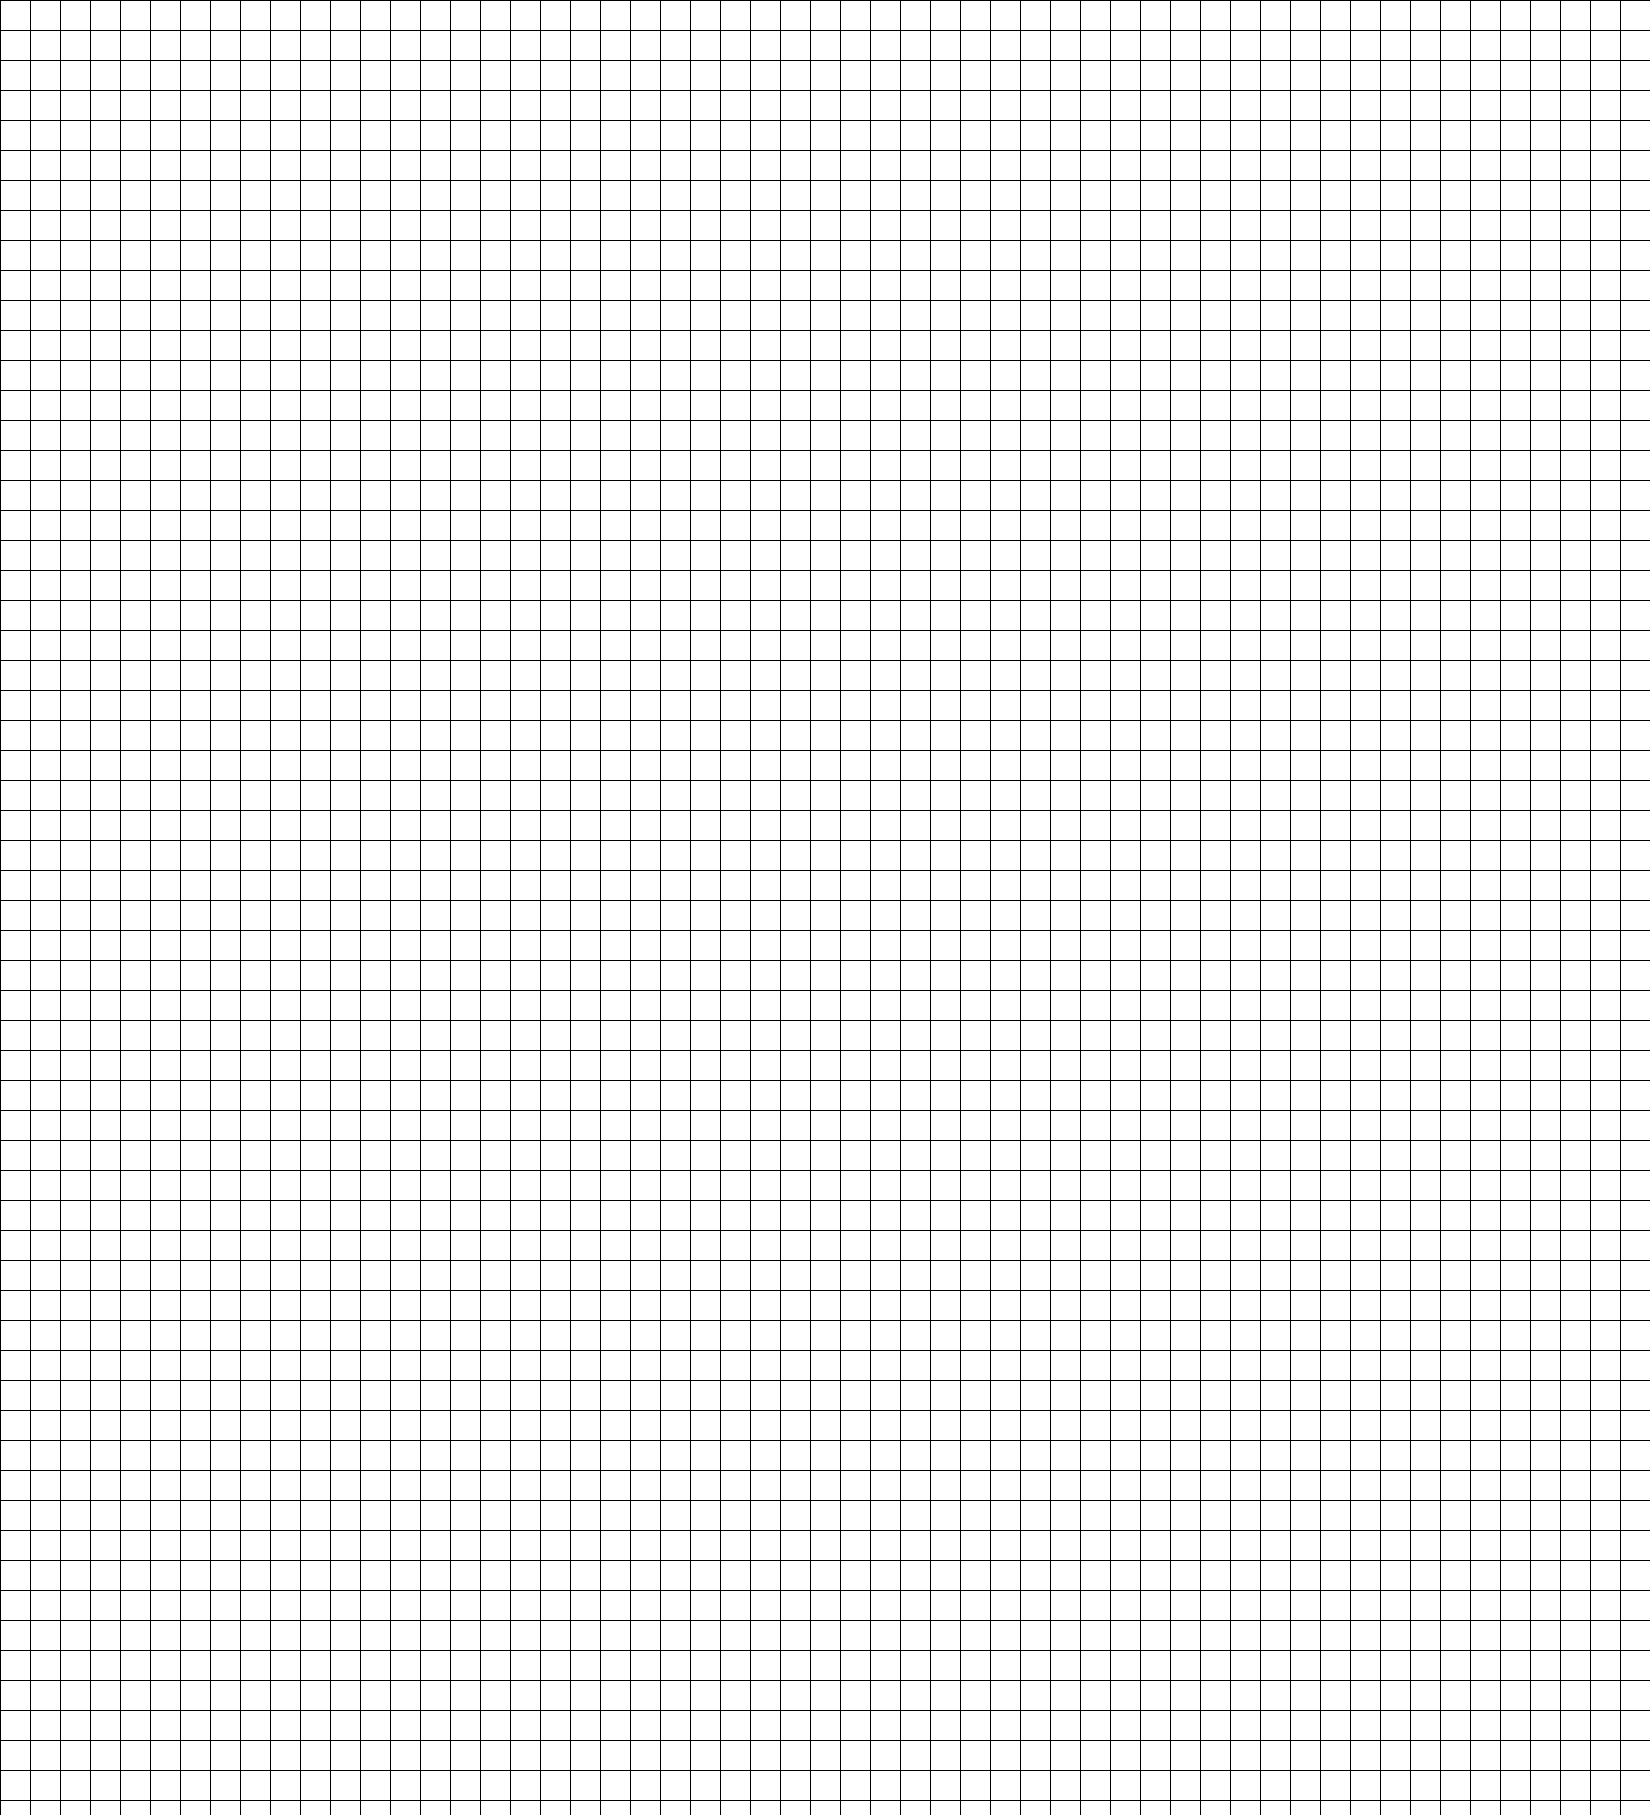


Day day2:
  - Deployed trucks: 8 (5 new, 3 maintained)
  - Deployed trucks: 8 (5 new, 3 maintained)
  - Daily profit: ₲3430.00 (Revenue: ₲5290.00, Cost: ₲1860.00)
    * Location truck29: Small (New)
    * Location truck8: Small (Maintained)
    * Location truck23: Small (New)
    * Location truck37: Small (Maintained)
    * Location truck17: Medium (Maintained)
    * Location truck33: Large (New)
    * Location truck15: Large (New)
    * Location truck45: Large (New)



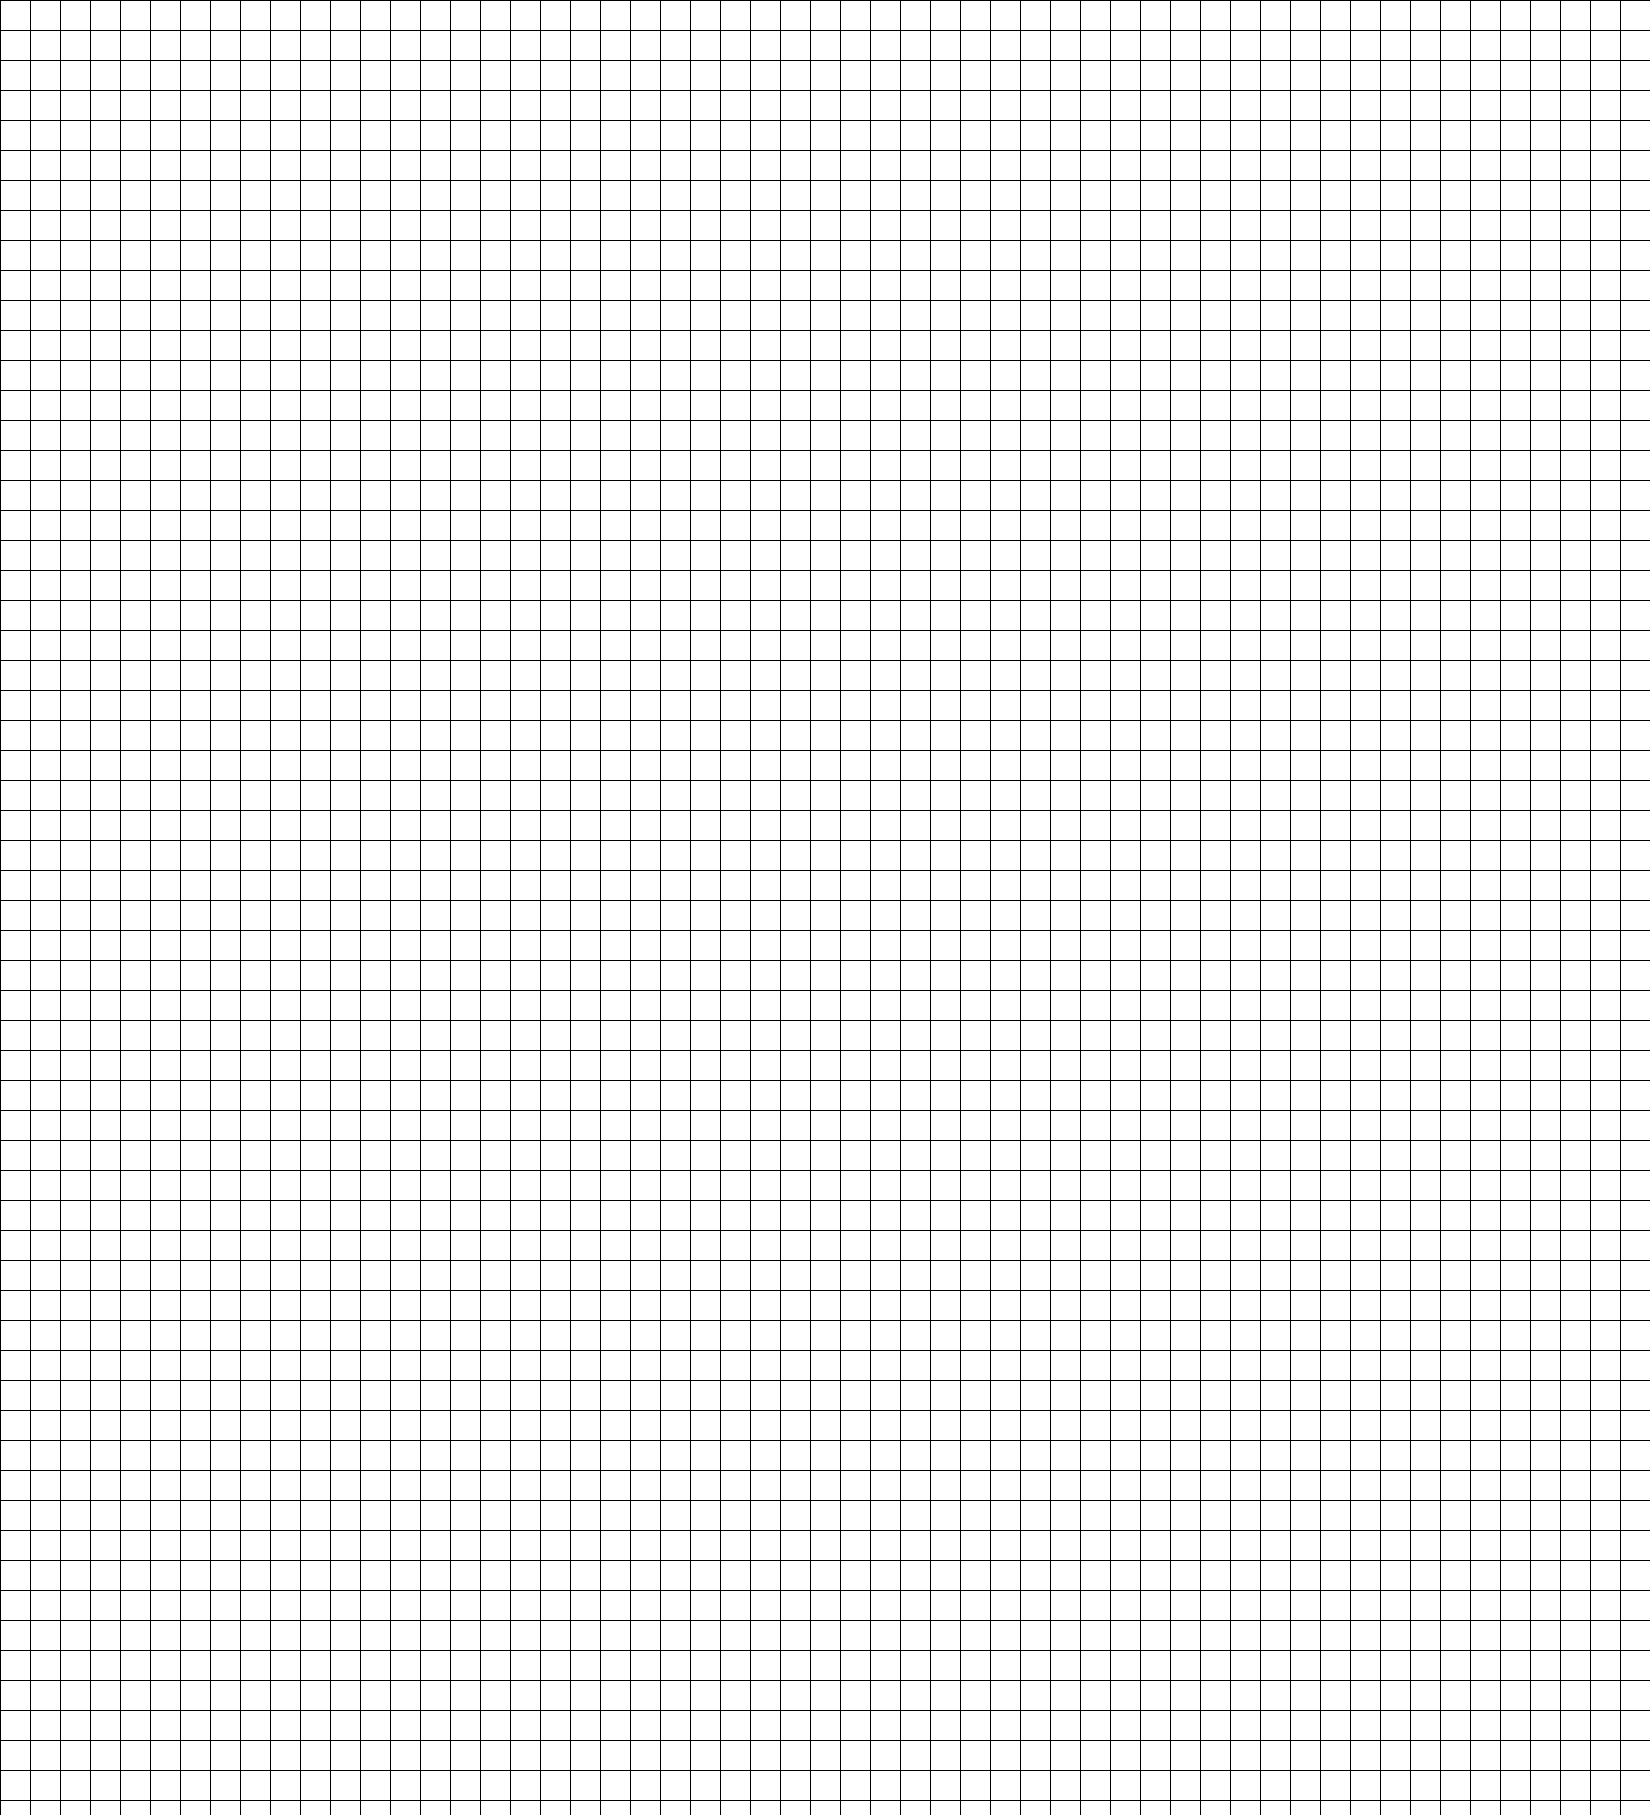


Day day3:
  - Deployed trucks: 7 (0 new, 7 maintained)
  - Deployed trucks: 7 (0 new, 7 maintained)
  - Daily profit: ₲1509.00 (Revenue: ₲2949.00, Cost: ₲1440.00)
    * Location truck8: Small (Maintained)
    * Location truck23: Small (Maintained)
    * Location truck37: Small (Maintained)
    * Location truck17: Medium (Maintained)
    * Location truck33: Large (Maintained)
    * Location truck15: Large (Maintained)
    * Location truck45: Large (Maintained)



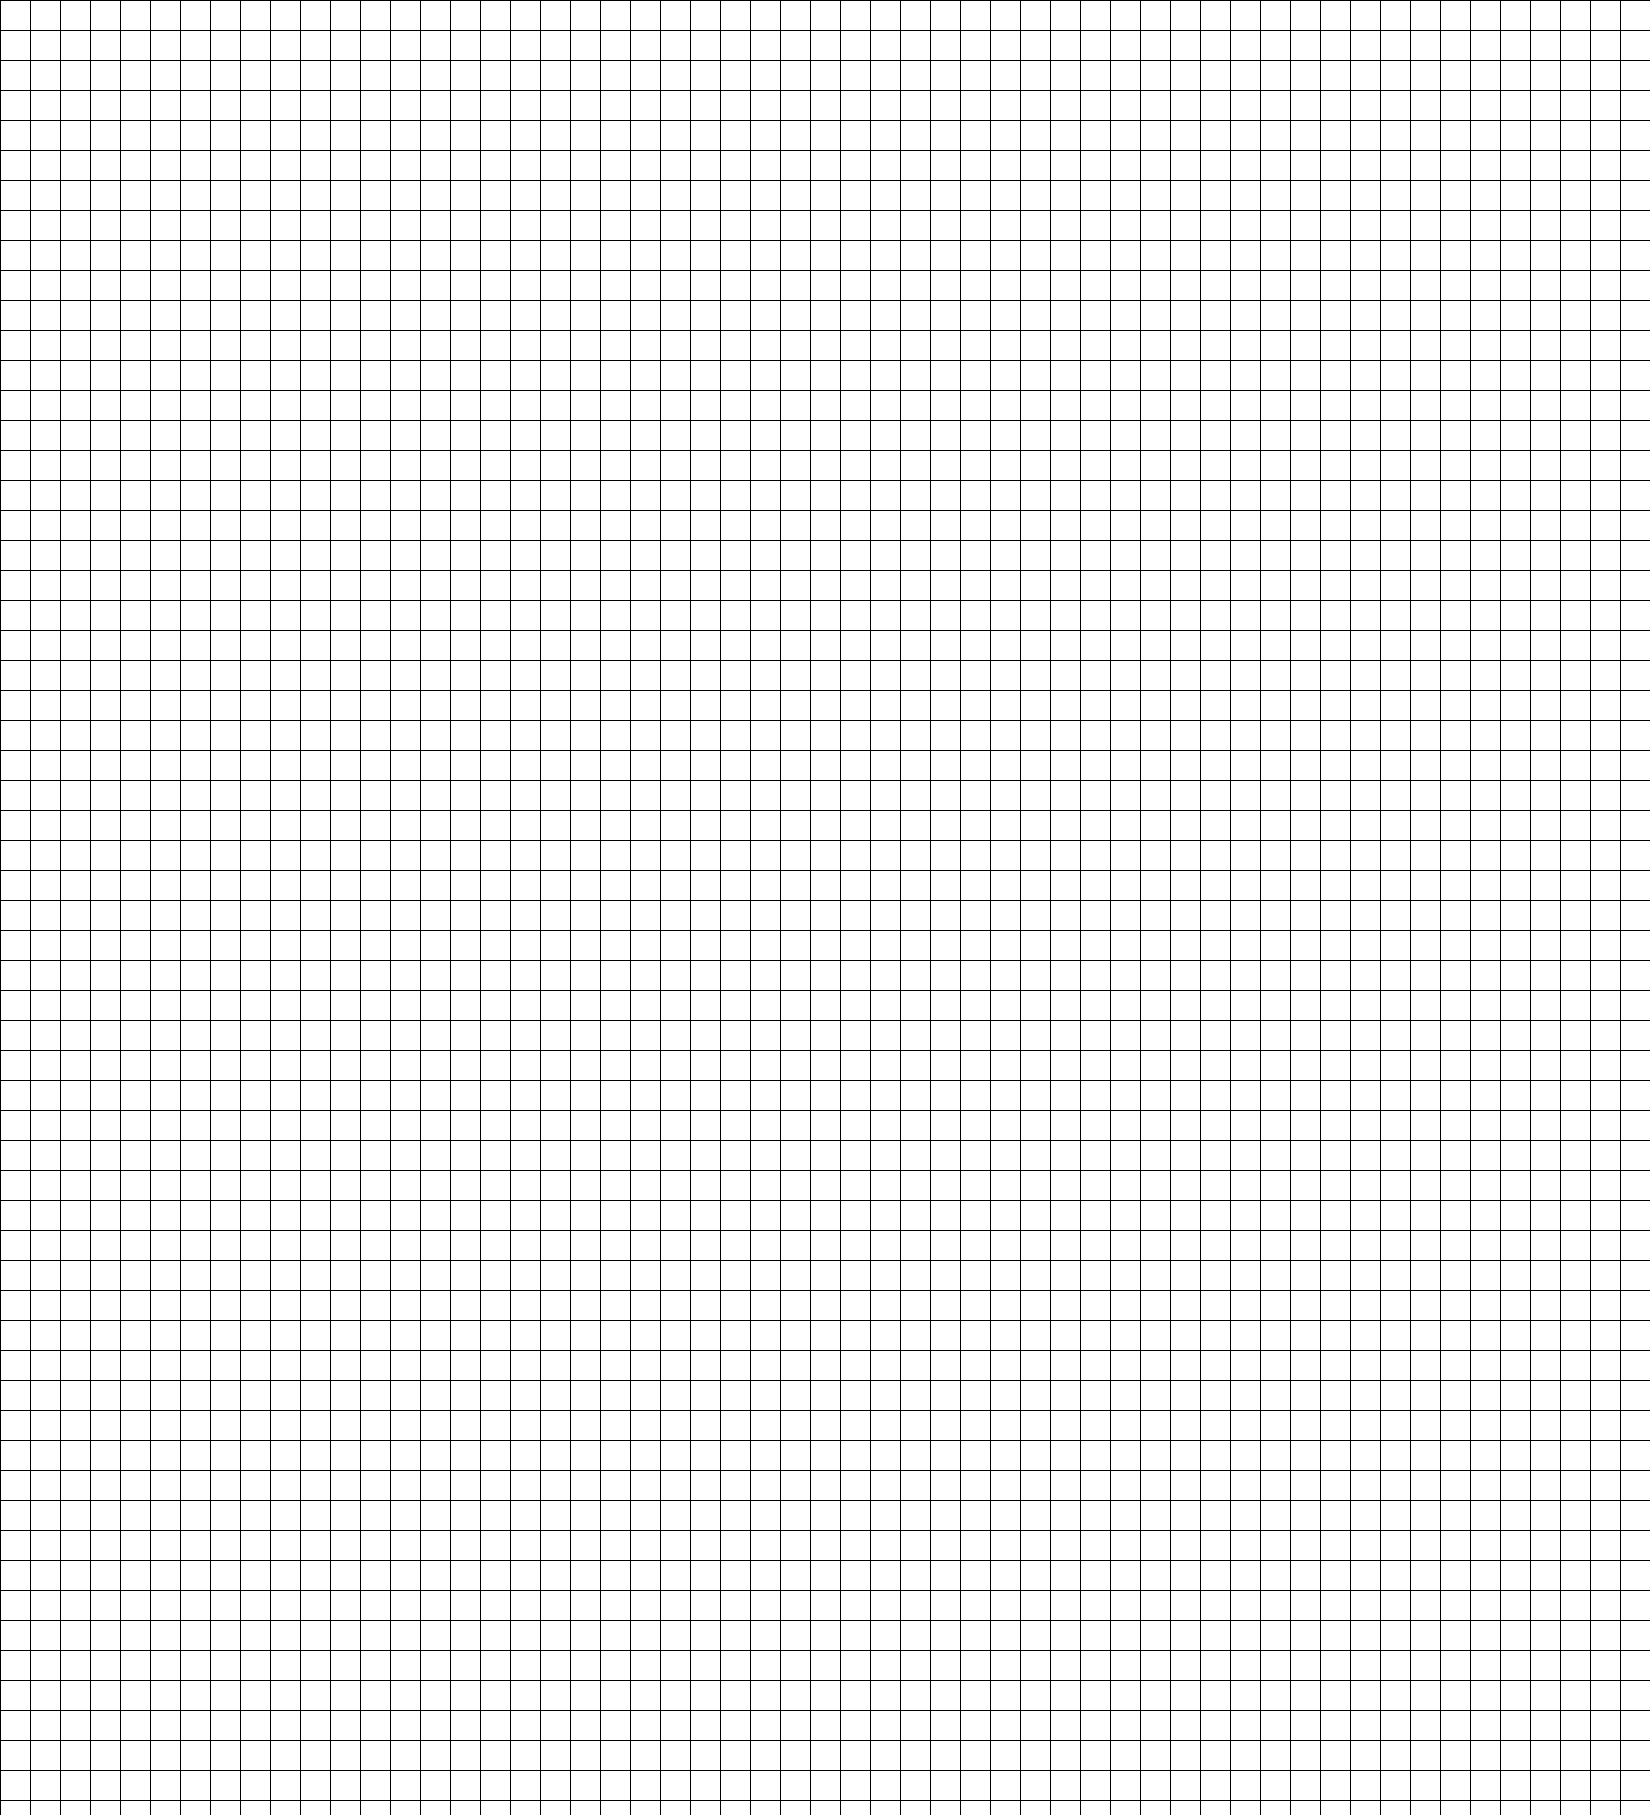


Day day4:
  - Deployed trucks: 7 (1 new, 6 maintained)
  - Deployed trucks: 7 (1 new, 6 maintained)
  - Daily profit: ₲1700.00 (Revenue: ₲3230.00, Cost: ₲1530.00)
    * Location truck8: Small (Maintained)
    * Location truck23: Small (Maintained)
    * Location truck17: Medium (Maintained)
    * Location truck53: Medium (New)
    * Location truck33: Large (Maintained)
    * Location truck15: Large (Maintained)
    * Location truck45: Large (Maintained)



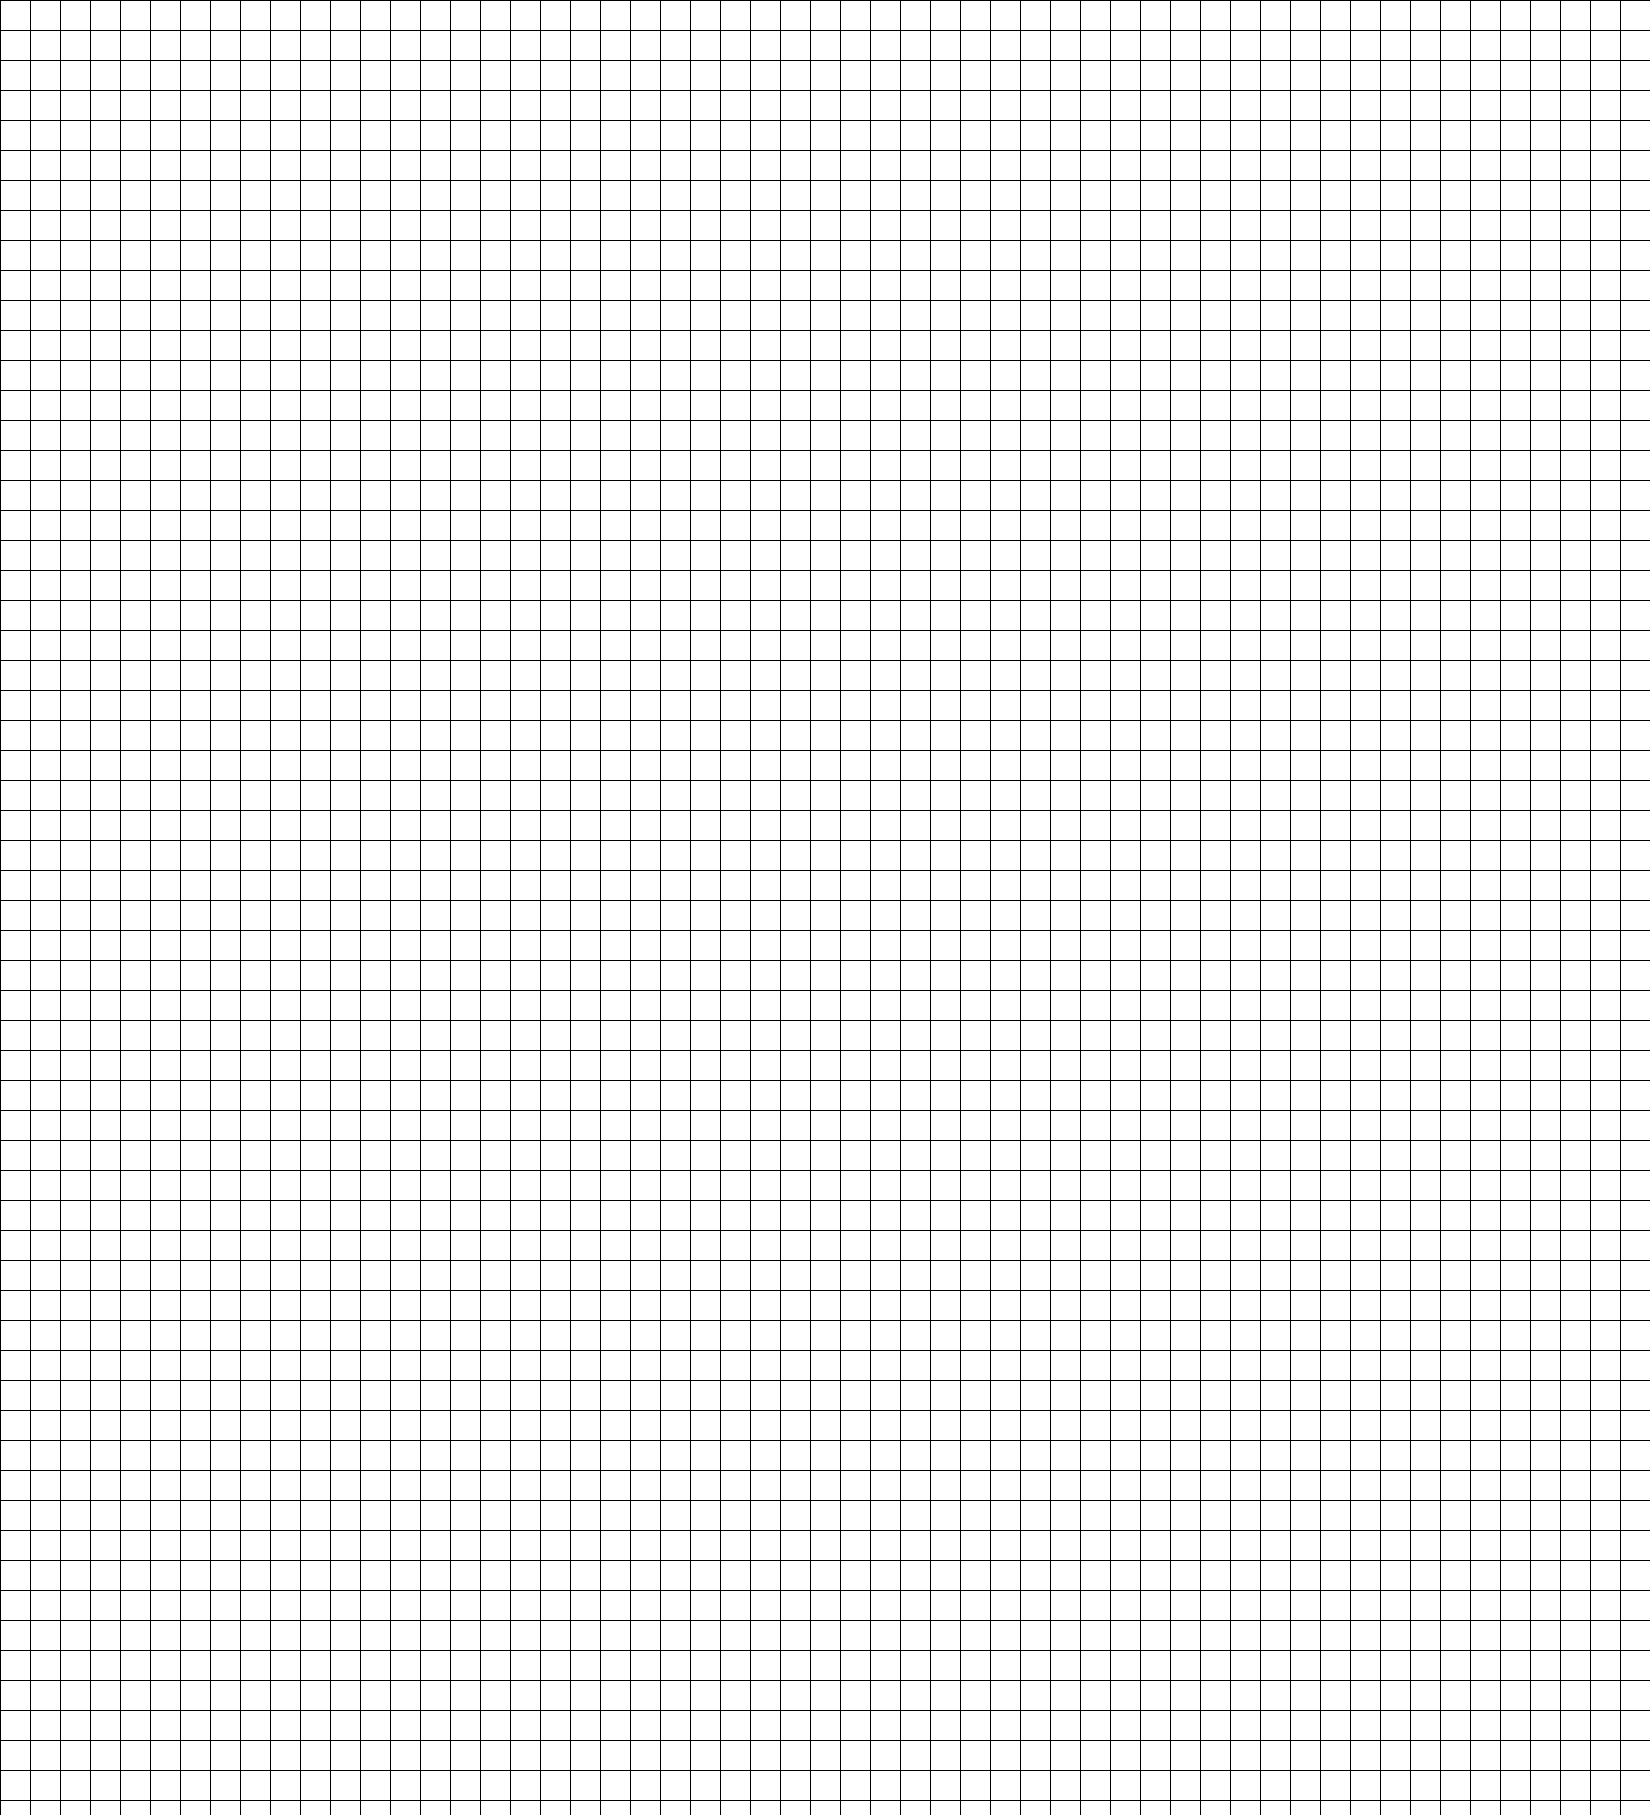


Day day5:
  - Deployed trucks: 13 (6 new, 7 maintained)
  - Deployed trucks: 13 (6 new, 7 maintained)
  - Daily profit: ₲7065.00 (Revenue: ₲10155.00, Cost: ₲3090.00)
    * Location truck8: Small (Maintained)
    * Location truck23: Small (Maintained)
    * Location truck26: Medium (New)
    * Location truck3: Medium (New)
    * Location truck17: Medium (Maintained)
    * Location truck53: Medium (Maintained)
    * Location truck37: Medium (New)
    * Location truck33: Large (Maintained)
    * Location truck15: Large (Maintained)
    * Location truck7: Large (New)
    * Location truck45: Large (Maintained)
    * Location truck40: Large (New)
    * Location truck19: Large (New)



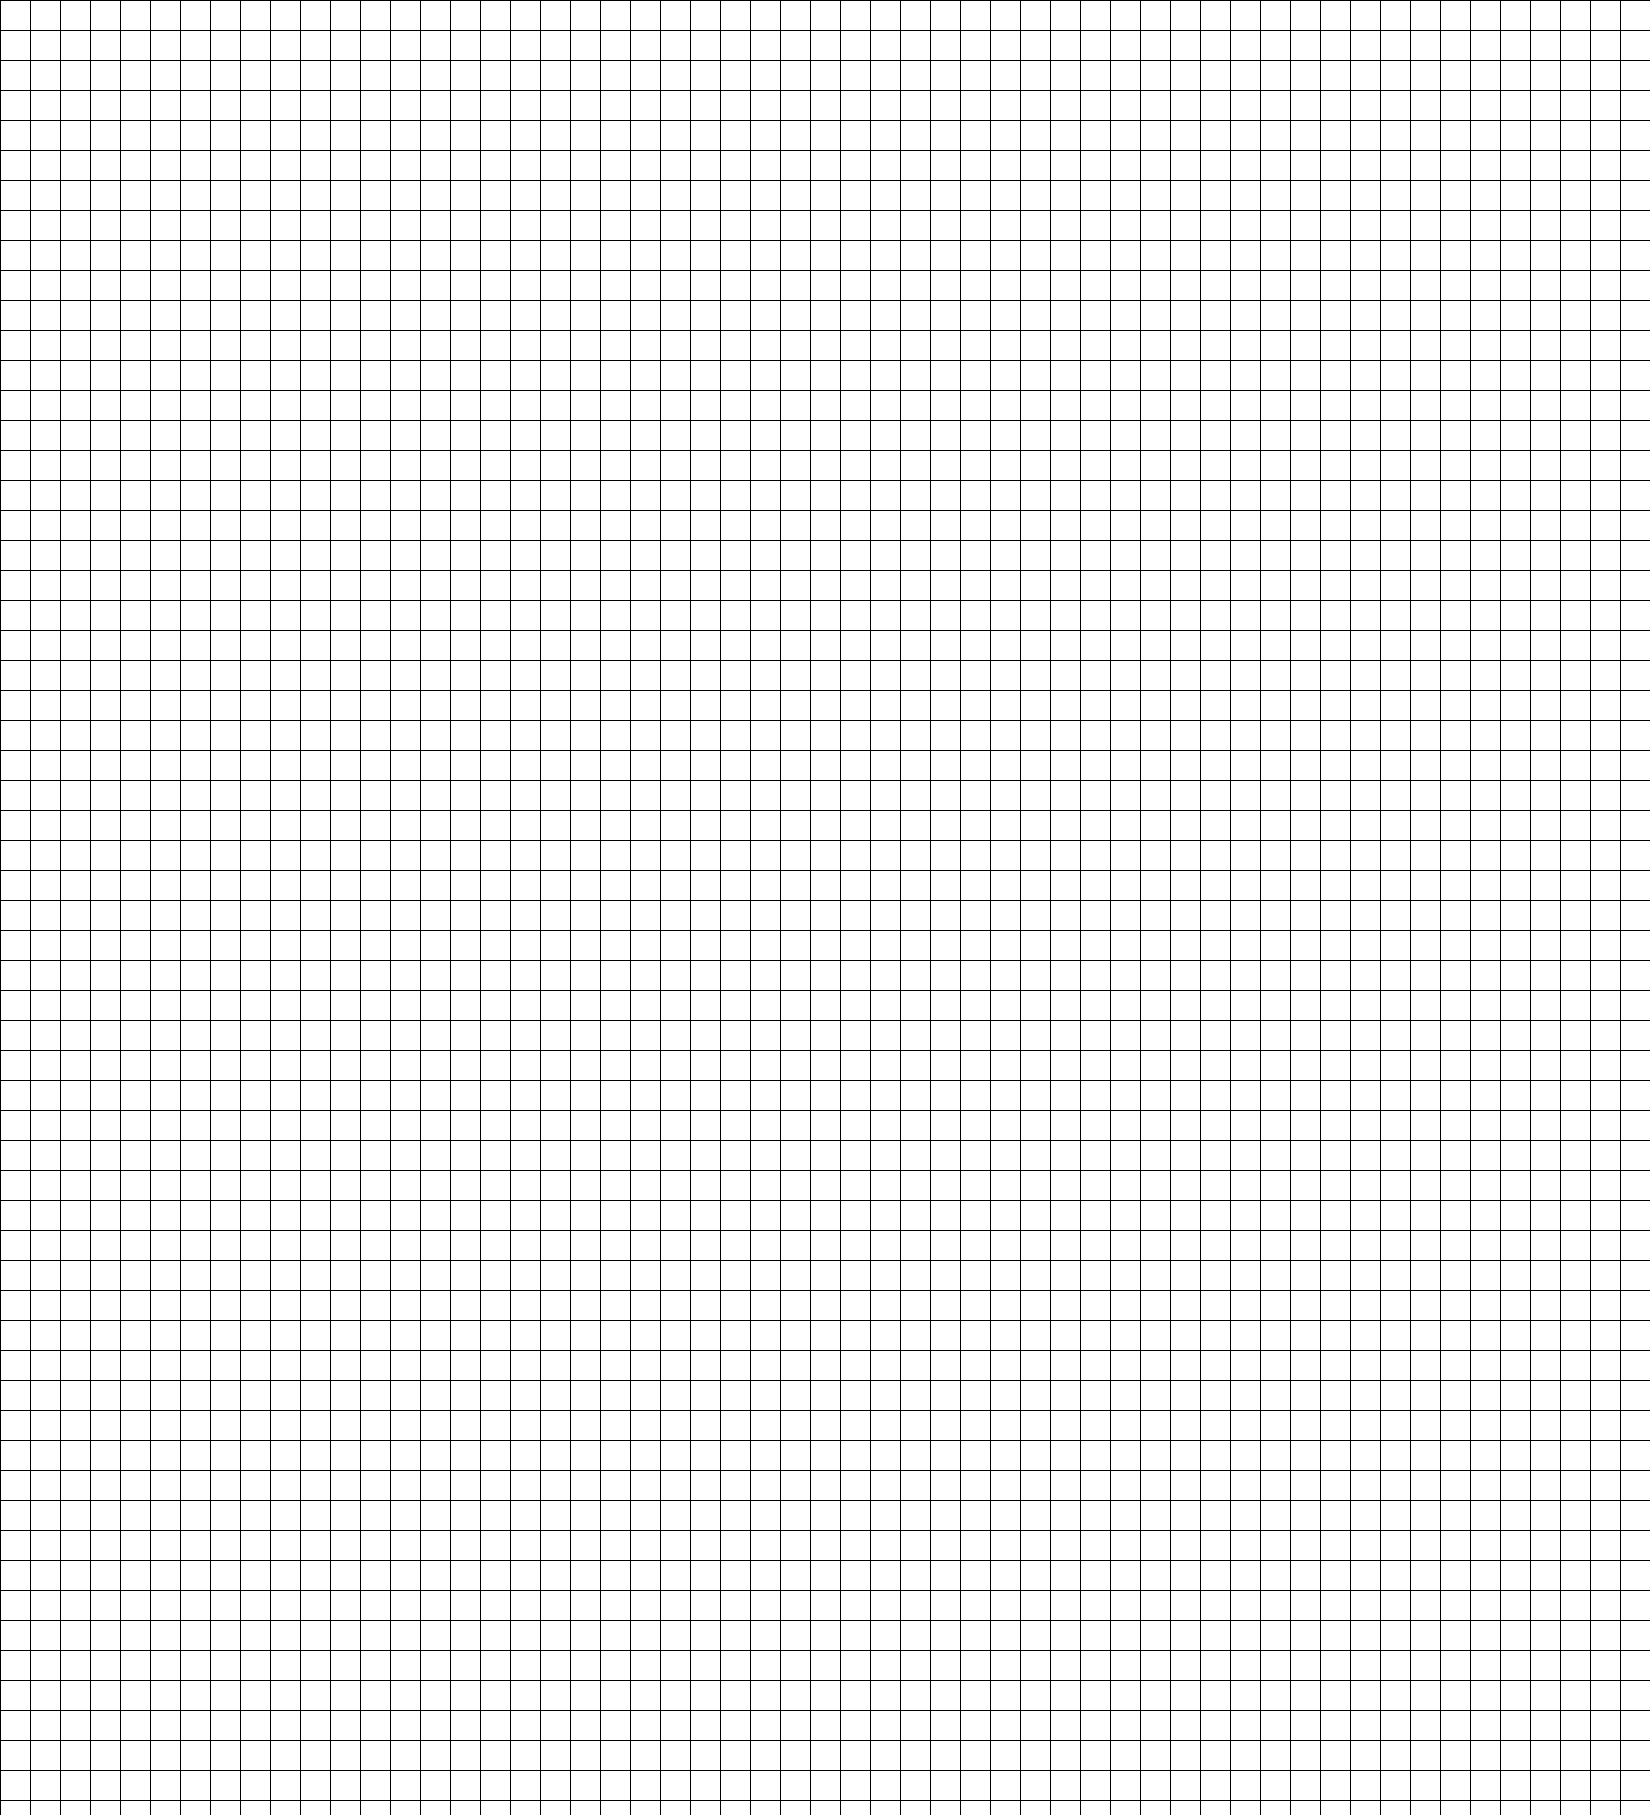


Day day6:
  - Deployed trucks: 4 (0 new, 4 maintained)
  - Deployed trucks: 4 (0 new, 4 maintained)
  - Daily profit: ₲270.00 (Revenue: ₲1560.00, Cost: ₲1290.00)
    * Location truck8: Small (Maintained)
    * Location truck17: Medium (Maintained)
    * Location truck37: Medium (Maintained)
    * Location truck33: Large (Maintained)



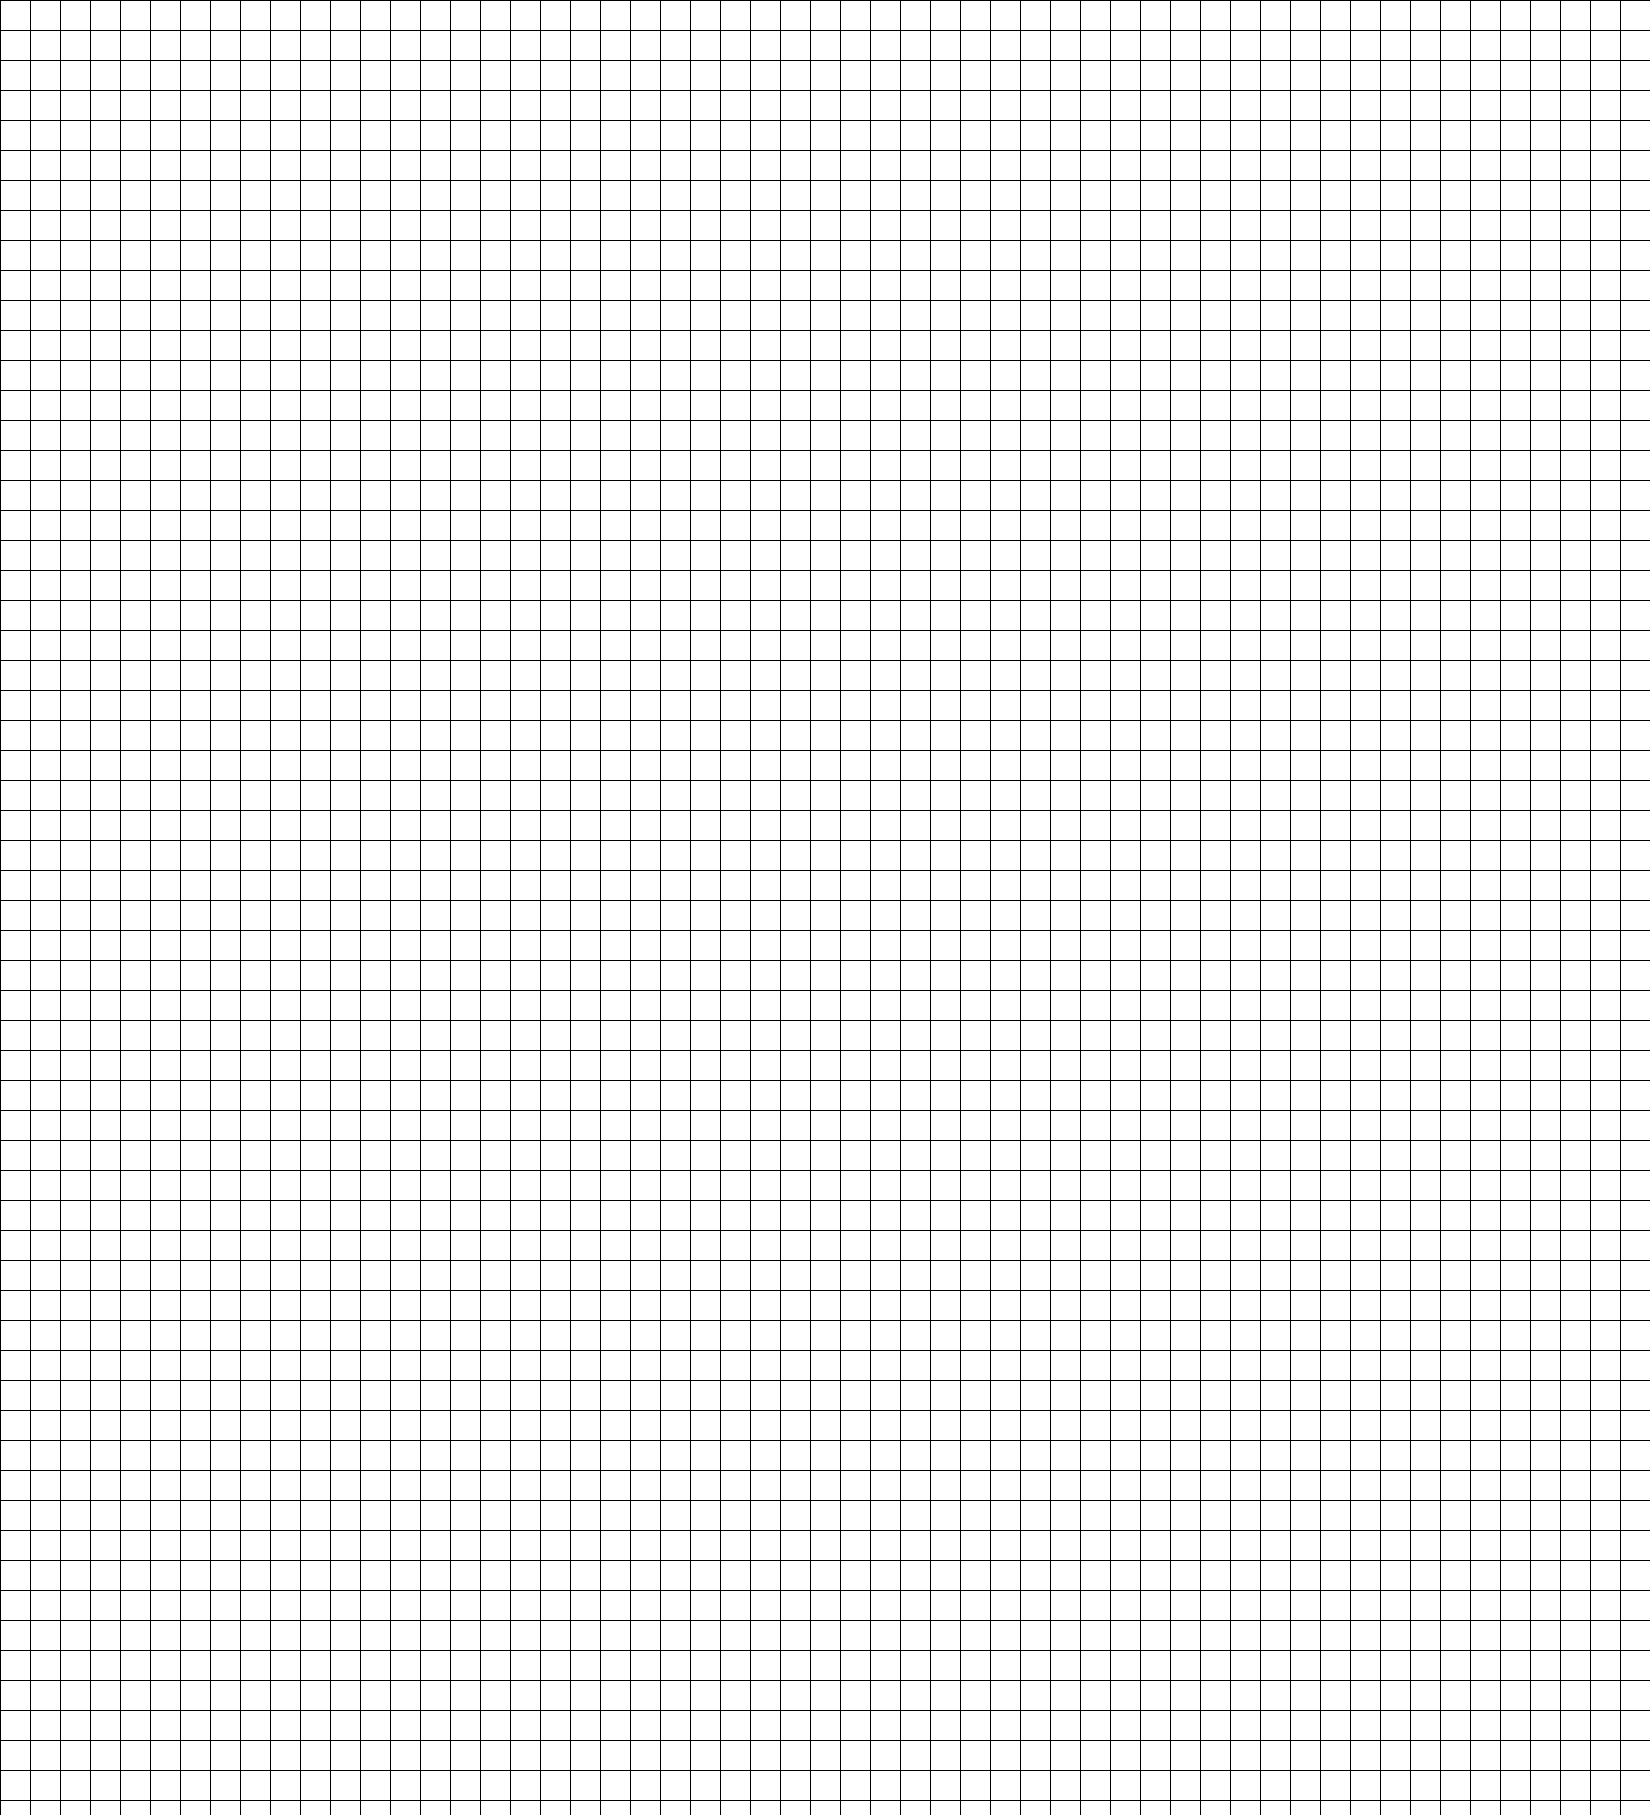


Day day7:
  - Deployed trucks: 8 (4 new, 4 maintained)
  - Deployed trucks: 8 (4 new, 4 maintained)
  - Daily profit: ₲3620.00 (Revenue: ₲5370.00, Cost: ₲1750.00)
    * Location truck44: Small (New)
    * Location truck8: Small (Maintained)
    * Location truck23: Small (New)
    * Location truck17: Medium (Maintained)
    * Location truck45: Medium (New)
    * Location truck37: Medium (Maintained)
    * Location truck33: Large (Maintained)
    * Location truck15: Large (New)



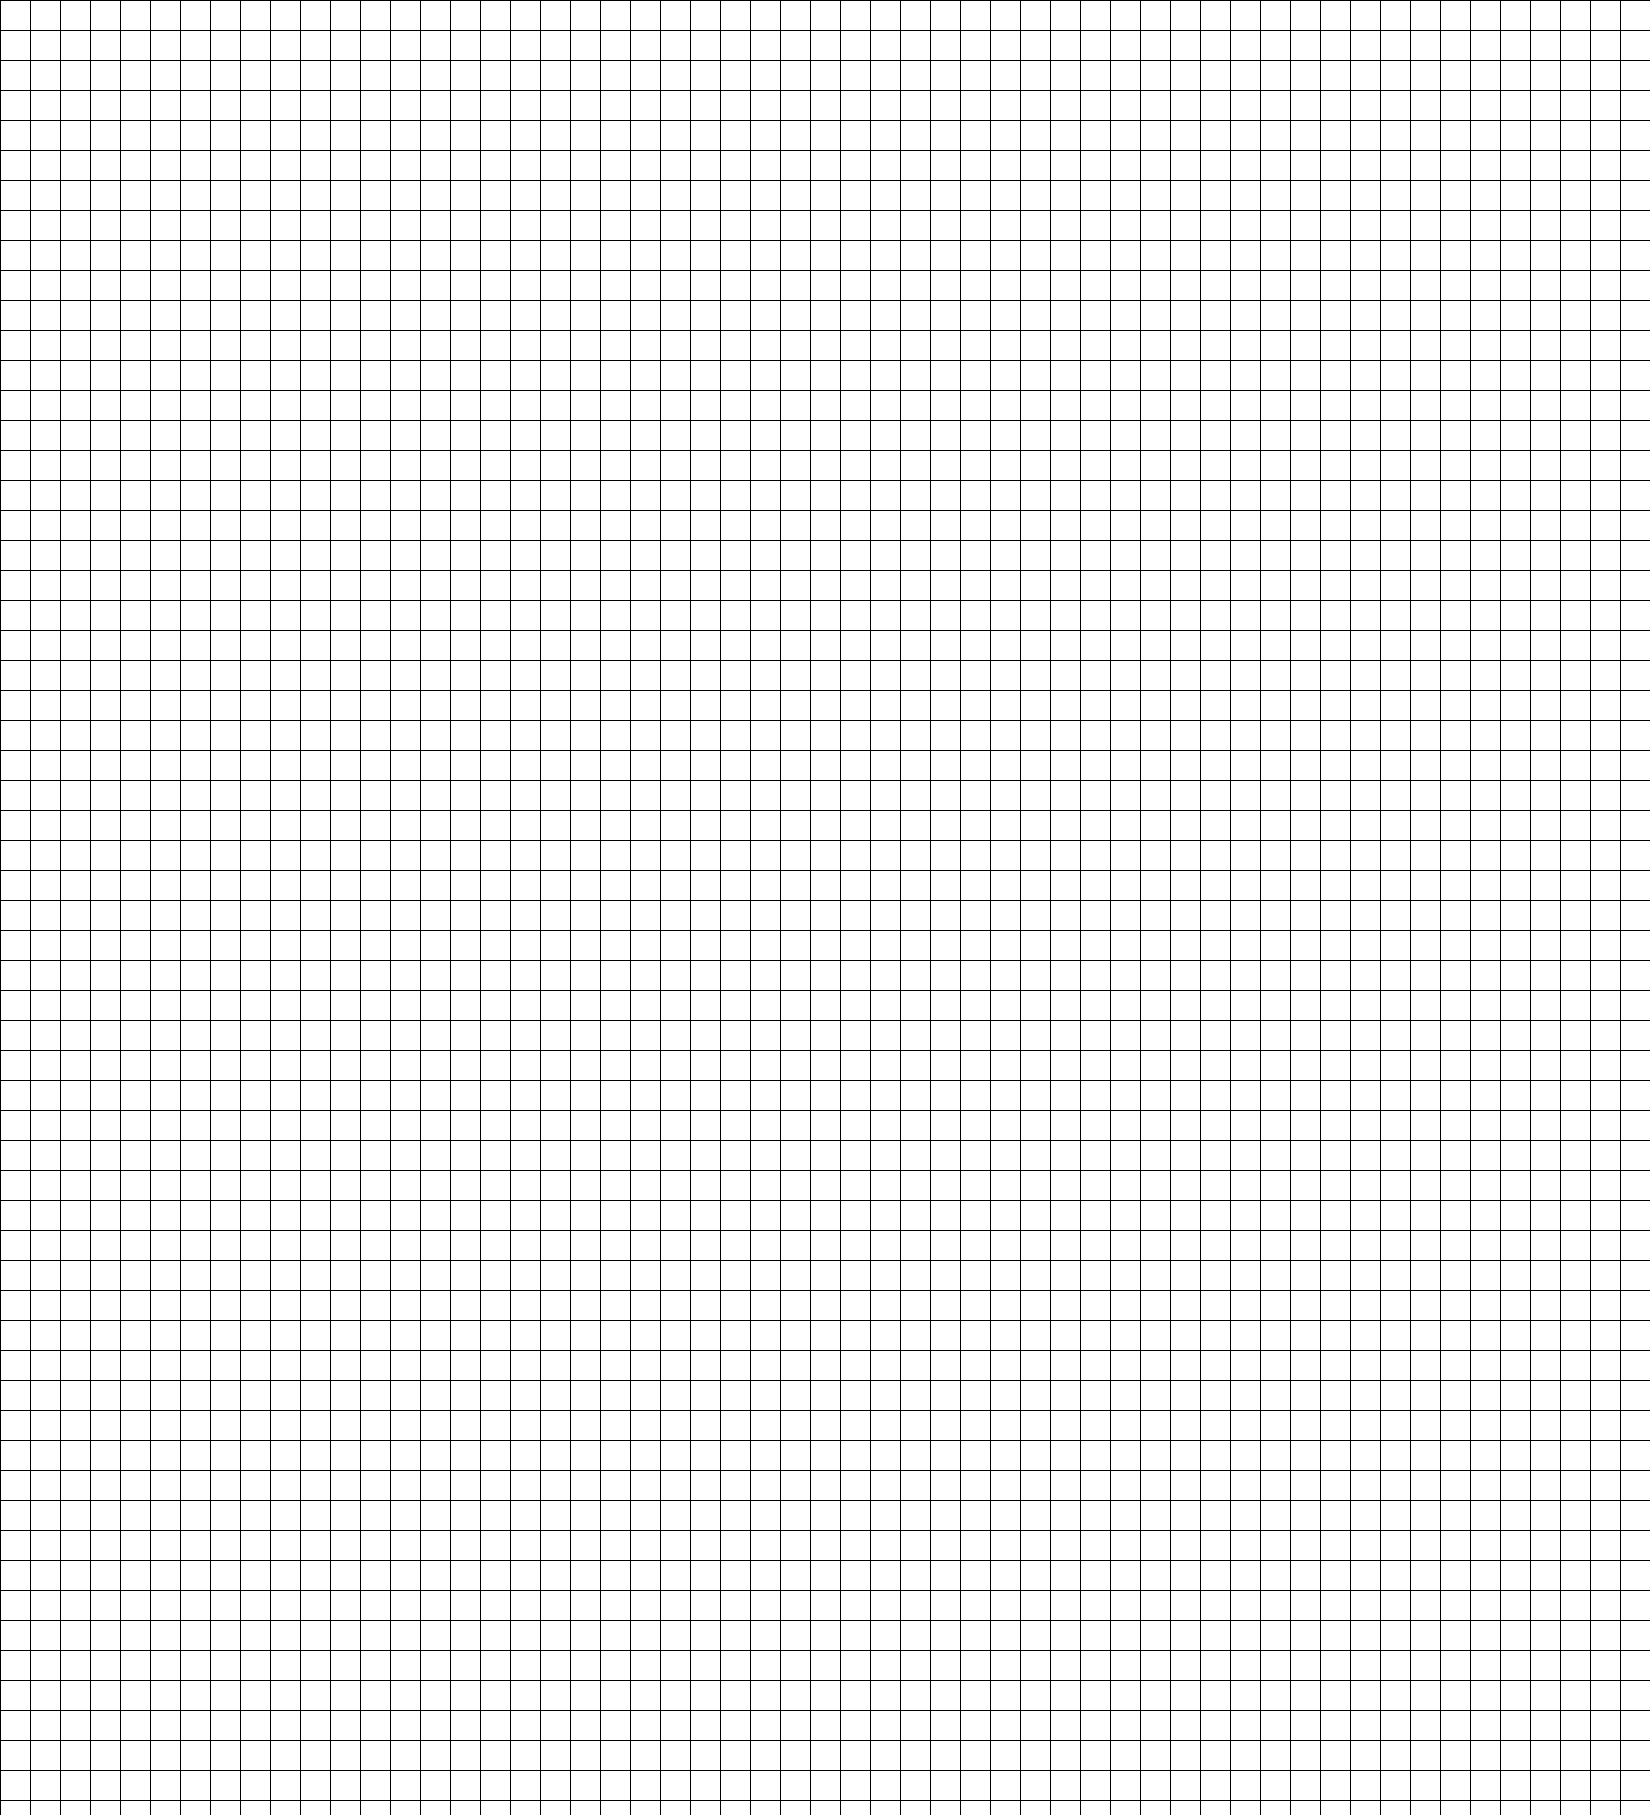

In [6]:
import os
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
from itertools import product
import time

# ================== Enhanced Data Loading Function ==================
def load_multi_period_data(base_path='./Data', days=7):
    """More robust data loading function"""
    all_data = {}
    all_truck_spots = set()
    
    # First collect all possible truck locations
    for day in range(1, days+1):
        day_folder = f"day_{day}"
        truck_path = f"{base_path}/{day_folder}/round1-day{day}_truck_node_data.csv"
        if os.path.exists(truck_path):
            df_truck = pd.read_csv(truck_path)
            all_truck_spots.update(df_truck['index'].unique())
    
    for day in range(1, days+1):
        day_key = f'day{day}'
        day_data = {}
        day_folder = f"day_{day}"
        print(f"\nLoading {day_key} data...")
        
        try:
            # 1. Problem data
            problem_path = f"{base_path}/{day_folder}/round1-day{day}_problem_data.csv"
            df_problem = pd.read_csv(problem_path)
            day_data.update({
                'burrito_price': float(df_problem['burrito_price'][0]),
                'ingredient_cost': float(df_problem['ingredient_cost'][0]),
                'truck_cost': float(df_problem['truck_cost'][0])
            })
            print(f"  Problem data loaded successfully | Price: ₲{day_data['burrito_price']} Cost: ₲{day_data['ingredient_cost']}")

            # 2. Truck locations (using complete set)
            truck_path = f"{base_path}/{day_folder}/round1-day{day}_truck_node_data.csv"
            df_truck = pd.read_csv(truck_path)
            day_data['truck_coordinates'] = {
                spot: (float(df_truck[df_truck['index']==spot]['x'].iloc[0]), 
                      float(df_truck[df_truck['index']==spot]['y'].iloc[0]))
                for spot in all_truck_spots if spot in df_truck['index'].values
            }
            day_data['truck_spots'] = list(all_truck_spots)  # Using complete set
            print(f"  Truck locations | Total: {len(day_data['truck_spots'])} Actually available: {len(day_data['truck_coordinates'])}")

            # 3. Demand data
            demand_path = f"{base_path}/{day_folder}/round1-day{day}_demand_node_data.csv"
            df_demand = pd.read_csv(demand_path)
            buildings_data = {
                row['index']: [row['name'], (float(row['x']), float(row['y'])), float(row['demand'])]
                for _, row in df_demand.iterrows()
            }
            day_data['buildings'], day_data['building_names'], day_data['building_coords'], day_data['demand'] = gp.multidict(buildings_data)
            print(f"  Demand nodes | Total: {len(day_data['buildings'])}")

            # 4. Distance and preference scores
            pairs_path = f"{base_path}/{day_folder}/round1-day{day}_demand_truck_data.csv"
            df_pairs = pd.read_csv(pairs_path)
            
            # Build valid pairs dictionary
            pairs_dict = {}
            for _, row in df_pairs.iterrows():
                i = row['demand_node_index']
                j = row['truck_node_index']
                if j in all_truck_spots and float(row['scaled_demand']) > 0:
                    pairs_dict[(i,j)] = [float(row['distance']), float(row['scaled_demand'])]
            
            # Safely create multidict
            if pairs_dict:
                day_data['pairs'], day_data['distance'], day_data['scaled_demand'] = gp.multidict(pairs_dict)
                print(f"  Valid customer-location pairs | Count: {len(day_data['pairs'])}")
            else:
                day_data['pairs'], day_data['distance'], day_data['scaled_demand'] = [], [], []
                print("  Warning: No valid customer-location pairs found")
            
            all_data[day_key] = day_data
            
        except Exception as e:
            print(f"  Failed to load {day_key} data: {str(e)}")
            raise
    
    return all_data

# ================== Revised Multi-Period Optimization Model ==================
def multi_period_optimization(data, truck_types, maintenance_cost_ratio=0.8, 
                            max_distance=500, work_name="MultiPeriod", 
                            write_lp=True, show_model=True, is_show_map=True):
    """Optimization model with fixed indexing errors"""
    days = sorted(data.keys())
    model = gp.Model("MultiPeriod_Deployment")
    model.Params.OutputFlag = int(show_model)
    
    print("\n" + "="*50)
    print(f"Starting to build multi-period model (Total {len(days)} days)")
    print(f"Truck types: {len(truck_types)} | Max distance: {max_distance}m")
    print("="*50 + "\n")
    
    # --- Decision Variables ---
    print("Creating decision variables...")
    start_time = time.time()
    
    # Use unified complete set of truck locations
    all_truck_spots = set()
    for day_data in data.values():
        all_truck_spots.update(day_data['truck_coordinates'].keys())
    all_truck_spots = list(all_truck_spots)
    
    # x[k,j,t]
    x = model.addVars(
        [(k, j, t) for k in truck_types 
                   for j in all_truck_spots 
                   for t in days],
        vtype=GRB.BINARY, name="x"
    )
    
    # y[i,j,t]
    y = model.addVars(
        [(i, j, t) for t in days 
                   for i,j in data[t]['pairs']],
        vtype=GRB.BINARY, name="y"
    )
    
    # u[k,j,t]
    u = model.addVars(
        [(k, j, t) for k in truck_types 
                   for j in all_truck_spots 
                   for t in days[1:]],
        vtype=GRB.BINARY, name="u"
    )
    
    print(f"Variables created | Time: {time.time()-start_time:.2f}s")
    print(f"  - Deployment variables x: {len(x)}")
    print(f"  - Service variables y: {len(y)}")
    print(f"  - State change variables u: {len(u)}")
    
    # --- Objective Function ---
    print("\nBuilding objective function...")
    start_time = time.time()
    
    revenue = gp.quicksum(
        (data[t]['burrito_price'] - data[t]['ingredient_cost']) * 
        data[t]['scaled_demand'][i,j] * y[i,j,t]
        for t in days for i,j in data[t]['pairs']
    )
    
    maintenance_cost = gp.quicksum(
        (maintenance_cost_ratio * truck_types[k]['fixed_cost']) * (x[k,j,t] - u[k,j,t])
        for k in truck_types for j in all_truck_spots for t in days[1:]
    )
    
    deployment_cost = gp.quicksum(
        truck_types[k]['fixed_cost'] * u[k,j,t]
        for k in truck_types for j in all_truck_spots for t in days[1:]
    ) + gp.quicksum(
        truck_types[k]['fixed_cost'] * x[k,j,days[0]]
        for k in truck_types for j in all_truck_spots
    )
    
    model.setObjective(revenue - (maintenance_cost + deployment_cost), GRB.MAXIMIZE)
    print(f"Objective function built | Time: {time.time()-start_time:.2f}s")
    
    # --- Constraints ---
    print("\nBuilding constraints...")
    start_time = time.time()
    
    # State transition constraints (using clearer XOR implementation)
    print("  - State transition constraints...")
    for k in truck_types:
        for j in all_truck_spots:
            for t in days[1:]:
                prev_day = days[days.index(t)-1]
                # Method 1: Use Gurobi built-in XOR (recommended)
                if hasattr(model, 'addGenConstrXor'):
                    model.addGenConstrXor(
                        [x[k,j,t]], [x[k,j,prev_day]], 
                        u[k,j,t],
                        name=f"StateChangeXOR_{k}_{j}_{t}"
                    )
                # Method 2: Linearization method (backward compatible)
                else:
                    model.addConstr(
                        u[k,j,t] >= x[k,j,t] - x[k,j,prev_day],
                        name=f"StateChange1_{k}_{j}_{t}"
                    )
                    model.addConstr(
                        u[k,j,t] >= x[k,j,prev_day] - x[k,j,t],
                        name=f"StateChange2_{k}_{j}_{t}"
                    )
                    model.addConstr(
                        u[k,j,t] <= x[k,j,t] + x[k,j,prev_day],
                        name=f"StateChange3_{k}_{j}_{t}"
                    )
                    model.addConstr(
                        u[k,j,t] <= 2 - x[k,j,t] - x[k,j,prev_day],
                        name=f"StateChange4_{k}_{j}_{t}"
                    )
    
    # 2. Daily constraints
    for t in days:
        print(f"  - Day {t} constraints...")
        current_truck_spots = set(data[t]['truck_coordinates'].keys())
        
        # Single service constraint
        model.addConstrs(
            (gp.quicksum(y[i,j,t] for j in current_truck_spots if (i,j) in data[t]['pairs']) <= 1
            for i in data[t]['buildings']),
            name=f"SingleService_{t}"
        )
        
        # Service activation (only for currently available truck spots)
        model.addConstrs(
            (y[i,j,t] <= gp.quicksum(x[k,j,t] for k in truck_types if j in current_truck_spots)
            for i,j in data[t]['pairs']),
            name=f"Activation_{t}"
        )
        
        # Distance constraint
        model.addConstrs(
            (y[i,j,t] * data[t]['distance'][i,j] <= max_distance
            for i,j in data[t]['pairs']),
            name=f"Distance_{t}"
        )
        
        # Capacity constraint (only for currently available truck spots)
        model.addConstrs(
            (gp.quicksum(
                data[t]['scaled_demand'][i,j] * y[i,j,t] 
                for i in data[t]['buildings'] if (i,j) in data[t]['pairs']
            ) <= gp.quicksum(
                truck_types[k]['capacity'] * x[k,j,t] 
                for k in truck_types if j in current_truck_spots
            ) for j in current_truck_spots),
            name=f"Capacity_{t}"
        )
        
        # Truck type uniqueness
        model.addConstrs(
            (gp.quicksum(x[k,j,t] for k in truck_types if j in current_truck_spots) <= 1
            for j in current_truck_spots),
            name=f"Uniqueness_{t}"
        )
    
    print(f"Constraints built | Total constraints: {model.NumConstrs} | Time: {time.time()-start_time:.2f}s")
    
    # --- Model Solving ---
    if write_lp:
        print("\nWriting LP file...")
        model.write(f"{work_name}.lp")
    
    print("\nStart solving...")
    start_time = time.time()
    model.optimize()
    print(f"Solving completed | Status: {model.status} | Time: {time.time()-start_time:.2f}s")
    
    # ================== Revised Result Analysis Section ==================
    if model.status == GRB.OPTIMAL:
        print("\n" + "="*50)
        print(f"Optimal solution (Total profit: ₲{model.objVal:.2f})")
        print("="*50)

        for t in days:
            current_truck_spots = set(data[t]['truck_coordinates'].keys())
            print(f"\nDay {t}:")

            # Deployment statistics
            deployed = [(k,j) for k,j,_ in x.keys() 
                       if x[k,j,t].X > 0.5 and j in current_truck_spots and _ == t]

            # Fix point: special handling for day1
            if t == days[0]:  # First day
                new_deploy = [j for k,j in deployed]  # All are new deployments
                deploy_status = "New"
            else:  # Day 2 and beyond
                prev_day = days[days.index(t)-1]
                new_deploy = [j for k,j in deployed 
                             if x[k,j,prev_day].X < 0.5]
                deploy_status = f"{len(new_deploy)} new, {len(deployed)-len(new_deploy)} maintained"

            print(f"  - Deployed trucks: {len(deployed)} ({deploy_status})")
            
            # Calculate daily profit
            day_revenue = sum(
                (data[t]['burrito_price'] - data[t]['ingredient_cost']) * 
                data[t]['scaled_demand'][i,j] * y[i,j,t].X
                for i,j in data[t]['pairs']
            )
            
            if t == days[0]:
                day_cost = sum(
                    truck_types[k]['fixed_cost'] * x[k,j,t].X
                    for k in truck_types for j in all_truck_spots
                )
            else:
                day_cost = sum(
                    (maintenance_cost_ratio * truck_types[k]['fixed_cost']) * (x[k,j,t].X - u[k,j,t].X) +
                    truck_types[k]['fixed_cost'] * u[k,j,t].X
                    for k in truck_types for j in all_truck_spots
                )
            
            day_profit = day_revenue - day_cost

            print(f"  - Deployed trucks: {len(deployed)} ({deploy_status})")
            print(f"  - Daily profit: ₲{day_profit:.2f} (Revenue: ₲{day_revenue:.2f}, Cost: ₲{day_cost:.2f})")
            
            for k,j in deployed:
                # Fix point: accurately determine status
                status = "New" if (t == days[0] or j in new_deploy) else "Maintained"
                typ = ['Small','Medium','Large'][k]
                print(f"    * Location {j}: {typ} ({status})")
            
            # Visualization
            if is_show_map:
                placed_trucks = [j for k,j,_ in x.keys() 
                               if x[k,j,t].X > 0.5 and _ == t and j in current_truck_spots]
                show_map(
                    data[t]['buildings'], data[t]['building_names'],
                    data[t]['building_coords'], data[t]['demand'],
                    data[t]['truck_coordinates'], placed_trucks
                )
    
    return model

# ================== Main Execution Flow ==================
if __name__ == "__main__":
    # Define truck types
    truck_types = {
        0: {'capacity': 100, 'fixed_cost': 200, 'maintenance_cost': 40},  # Small
        1: {'capacity': 150, 'fixed_cost': 250, 'maintenance_cost': 50},  # Medium
        2: {'capacity': 200, 'fixed_cost': 300, 'maintenance_cost': 60}   # Large
    }
    
    try:
        # Load data
        print("Start loading data...")
        all_data = load_multi_period_data(days=7)
        
        # Run optimization
        model = multi_period_optimization(
            all_data, truck_types,
            maintenance_cost_ratio=0.8,
            max_distance=500,
            work_name="MultiPeriod_Opt",
            write_lp=True,
            show_model=True,
            is_show_map=True
        )
        
    except Exception as e:
        print(f"\n!!! Runtime error: {str(e)}")
        raise

In [3]:
pd.DataFrame(all_data)

,day1,day2,day3,day4,day5,day6,day7
burrito_price,10.0,10.0,10.0,10.0,10.0,10.0,10.0
ingredient_cost,5.0,5.0,7.0,5.0,5.0,5.0,5.0
truck_cost,250.0,250.0,250.0,250.0,250.0,250.0,250.0
truck_coordinates,"{'truck54': (320.5598526703499, 273.5659432387...","{'truck54': (320.5598526703499, 273.5659432387...","{'truck54': (320.5598526703499, 273.5659432387...","{'truck54': (320.5598526703499, 273.5659432387...","{'truck26': (121.14180478821363, 337.222036727...","{'truck54': (320.5598526703499, 273.5659432387...","{'truck54': (320.5598526703499, 273.5659432387..."
truck_spots,"[truck26, truck54, truck4, truck42, truck27, t...","[truck26, truck54, truck4, truck42, truck27, t...","[truck26, truck54, truck4, truck42, truck27, t...","[truck26, truck54, truck4, truck42, truck27, t...","[truck26, truck54, truck4, truck42, truck27, t...","[truck26, truck54, truck4, truck42, truck27, t...","[truck26, truck54, truck4, truck42, truck27, t..."
buildings,"[demand2, demand11, demand12, demand14, demand...","[demand2, demand9, demand11, demand12, demand1...","[demand2, demand9, demand11, demand12, demand1...","[demand2, demand9, demand11, demand12, demand1...","[demand0, demand1, demand2, demand3, demand4, ...","[demand2, demand11, demand12, demand14, demand...","[demand2, demand9, demand11, demand12, demand1..."
building_names,"{'demand2': 'ReLU Realty', 'demand11': 'Reinfo...","{'demand2': 'ReLU Realty', 'demand9': 'Lift an...","{'demand2': 'ReLU Realty', 'demand9': 'Lift an...","{'demand2': 'ReLU Realty', 'demand9': 'Lift an...","{'demand0': 'Pipe Benders', 'demand1': 'Travel...","{'demand2': 'ReLU Realty', 'demand11': 'Reinfo...","{'demand2': 'ReLU Realty', 'demand9': 'Lift an..."
building_coords,"{'demand2': (190.72068753836712, 72.6611018363...","{'demand2': (190.72068753836712, 72.6611018363...","{'demand2': (190.72068753836712, 72.6611018363...","{'demand2': (190.72068753836712, 72.6611018363...","{'demand0': (95.67096378146104, 83.52921535893...","{'demand2': (190.72068753836712, 72.6611018363...","{'demand2': (190.72068753836712, 72.6611018363..."
demand,"{'demand2': 30.0, 'demand11': 5.0, 'demand12':...","{'demand2': 25.0, 'demand9': 25.0, 'demand11':...","{'demand2': 45.0, 'demand9': 60.0, 'demand11':...","{'demand2': 35.0, 'demand9': 20.0, 'demand11':...","{'demand0': 75.0, 'demand1': 70.0, 'demand2': ...","{'demand2': 30.0, 'demand11': 5.0, 'demand12':...","{'demand2': 25.0, 'demand9': 25.0, 'demand11':..."
pairs,"[(demand2, truck1), (demand2, truck6), (demand...","[(demand2, truck1), (demand2, truck6), (demand...","[(demand2, truck1), (demand2, truck6), (demand...","[(demand2, truck8), (demand11, truck15), (dema...","[(demand0, truck0), (demand0, truck1), (demand...","[(demand2, truck1), (demand2, truck6), (demand...","[(demand2, truck1), (demand2, truck6), (demand..."
